In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar 

In [7]:
# Load the shapefile
shapefile_path_1 = "Data/Revised/Geography/MSOA/London_2021.shp"
gdf_1 = gpd.read_file(shapefile_path_1)

# Load population data
msoa_2021_path = "Data/Revised/Population/MSOA_2021.csv"
msoa_2021_df = pd.read_csv(msoa_2021_path)

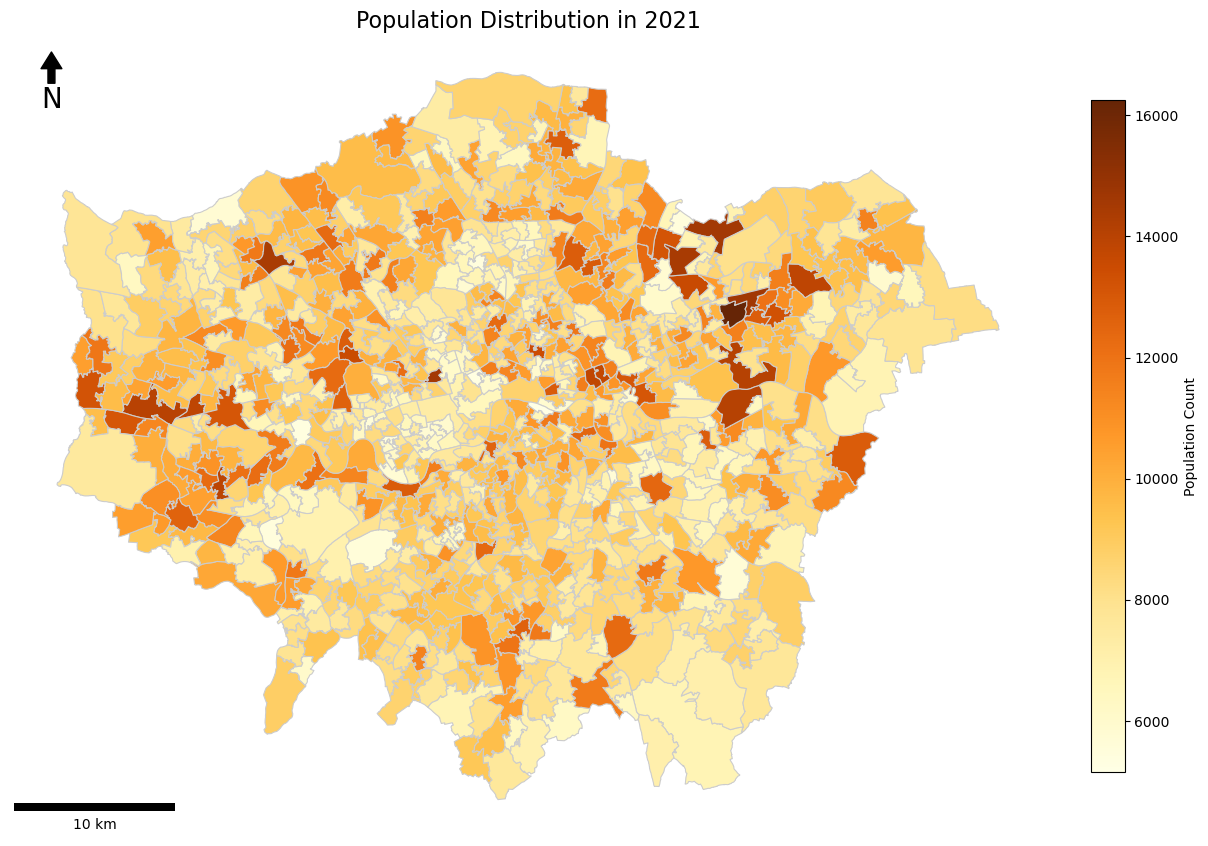

In [8]:
# Merge shapefile with population data for 2021
gdf_2021 = gdf_1.merge(msoa_2021_df, left_on='msoa21cd', right_on='MSOA 2021 Code', how='left')

# Ensure the 'Total' column is treated as a string before removing commas
gdf_2021['Total'] = gdf_2021['Total'].astype(str).str.replace(',', '')

# Convert the cleaned strings to numeric values
gdf_2021['Total'] = pd.to_numeric(gdf_2021['Total'], errors='coerce')

# Set font to DejaVu Sans globally, resembling Arial
plt.rcParams['font.family'] = 'DejaVu Sans'

# Define the colormap for use in the plot and color bar
cmap = 'YlOrBr'  # Yellow shades

# Plotting the choropleth map for 2021 counts
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Plot the data with the defined colormap
plot = gdf_2021.plot(
    column='Total', 
    cmap=cmap,  
    linewidth=0.8, 
    ax=ax, 
    edgecolor='0.8',
)

# Add title and turn off axis
ax.set_title('Population Distribution in 2021', fontsize=16)
ax.axis('off')

# Add North arrow
x, y, arrow_length = 0.04, 0.98, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords='axes fraction', zorder=5)

# Add scale bar with units in meters and set the background to transparent
scalebar = ScaleBar(dx=1, units="m", location='lower left', scale_loc='bottom', length_fraction=0.2, box_alpha=0)
ax.add_artist(scalebar)

# Add color bar (legend) to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf_2021['Total'].min(), vmax=gdf_2021['Total'].max()))
sm._A = []  # Dummy array for the color bar
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Population Count')

# Adjust layout to align the color bar, scale bar, and map at the bottom
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the figure as an image
output_path = "Data/2021.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

# Display the map
plt.show()

In [9]:
# Load the shapefile
shapefile_path_2 = "Data/Revised/Geography/MSOA/London_2011.shp"
gdf_2 = gpd.read_file(shapefile_path_2)

# Load population data
msoa_2011_path = "Data/Revised/Population/MSOA_2011.csv"
msoa_2011_df = pd.read_csv(msoa_2011_path)

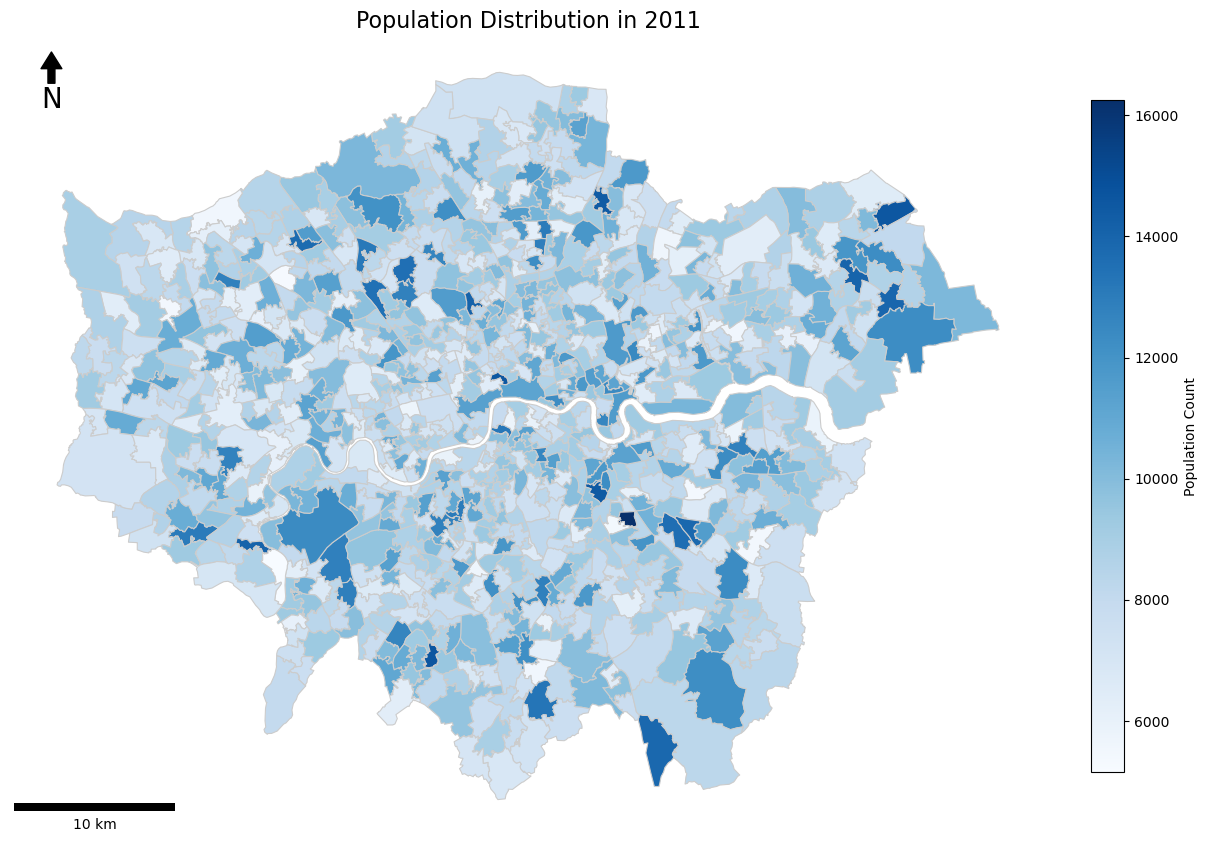

In [10]:
# Merge shapefile with population data for 2021
gdf_2011 = gdf_2.merge(msoa_2011_df, left_on='MSOA11CD', right_on='MSOA 2011 Code', how='left')

# Ensure the 'Total' column is treated as a string before removing commas
gdf_2011['Total'] = gdf_2021['Total'].astype(str).str.replace(',', '')

# Convert the cleaned strings to numeric values
gdf_2011['Total'] = pd.to_numeric(gdf_2021['Total'], errors='coerce')

# Set font to DejaVu Sans globally, resembling Arial
plt.rcParams['font.family'] = 'DejaVu Sans'

# Define the colormap for use in the plot and color bar
cmap = 'Blues'  # Blue shades

# Plotting the choropleth map for 2011 counts
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Plot the data with the defined colormap
plot = gdf_2011.plot(
    column='Total', 
    cmap=cmap,  
    linewidth=0.8, 
    ax=ax, 
    edgecolor='0.8',
)

# Add title and turn off axis
ax.set_title('Population Distribution in 2011', fontsize=16)
ax.axis('off')

# Add North arrow
x, y, arrow_length = 0.04, 0.98, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords='axes fraction', zorder=5)

# Add scale bar with units in meters and set the background to transparent
scalebar = ScaleBar(dx=1, units="m", location='lower left', scale_loc='bottom', length_fraction=0.2, box_alpha=0)
ax.add_artist(scalebar)

# Add color bar (legend) to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf_2021['Total'].min(), vmax=gdf_2021['Total'].max()))
sm._A = []  # Dummy array for the color bar
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Population Count')

# Adjust layout to align the color bar, scale bar, and map at the bottom
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the figure as an image
output_path = "Data/2011.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

# Display the map
plt.show()